# **Prediksi Harga Rumah di Wilayah California**
* Nama : Brilly Lutfan Qasthari
* Dataset : https://www.kaggle.com/datasets/shibumohapatra/house-price

## Domain Proyek
### Latar Belakang
Pasar real estat adalah salah satu sektor ekonomi terpenting dan harga real estat merupakan faktor kunci dalam keputusan pembelian real estat. Kemampuan memprediksi harga rumah dengan akurasi tinggi dapat membantu calon pembeli, penjual, dan pemangku kepentingan lainnya membuat keputusan yang lebih tepat. 

Pasar real estate di California sangat dinamis dan harga real estate seringkali sangat berfluktuasi. Oleh karena itu, memprediksi real estat dalam konteks ini merupakan tantangan yang menarik. Dalam *submission* ini, berfokus pada penggunaan model regresi pembelajaran mesin untuk memprediksi harga rumah di California [[1](https://www.researchgate.net/publication/350345452_Prediksi_Harga_Rumah_Menggunakan_Web_Scrapping_dan_Machine_Learning_Dengan_Algoritma_Linear_Regression)]. 

Model regresi *machine learning* adalah cara ampuh untuk mengeksplorasi pola dan hubungan antara karakteristik data dan variabel target, dalam hal ini harga rumah. Dengan menggunakan teknik regresi, model tersebut dapat digunakan untuk mempelajari pola harga properti berdasarkan karakteristik seperti lokasi, ukuran rumah, jumlah kamar tidur, dan faktor lain yang relevan [[2](https://ejournal.bsi.ac.id/ejurnal/index.php/ji/article/download/9036/pdf)].

Tujuan dari *submission* ini adalah mengembangkan model *machine learning* yang dapat memprediksi harga real estat di California dengan MSE(*Mean Squared Error*) kecil. Model ini dapat memberikan informasi berharga kepada calon pembeli rumah, agen real estat, dan pemangku kepentingan lainnya dalam keputusan penetapan harga rumah mereka.

## **Data Collection**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
!git clone https://github.com/projekbrillylutfan/kumpulan_dataset

fatal: destination path 'kumpulan_dataset' already exists and is not an empty directory.


In [ ]:
df_train = pd.read_csv("/content/kumpulan_dataset/california house price dataset/train.csv")
df_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.26     37.90                  37         2220           335.0   
1        -122.26     37.86                  52         3774           744.0   
2        -118.10     33.90                  35         1151           248.0   
3        -118.21     33.89                  42         1739           370.0   
4        -118.35     33.94                  35         1451           435.0   
...          ...       ...                 ...          ...             ...   
20428    -117.39     33.97                  52         3307           553.0   
20429    -118.25     33.84                  19         1731           420.0   
20430    -121.79     37.66                  22        14701          2210.0   
20431    -121.03     37.55                  32          946           198.0   
20432    -118.12     33.91                  36         1432           265.0   

       population  households  median_income ocean_proximity  \
0             903         362         7.8336        NEAR BAY   
1            1461         679         2.9405        NEAR BAY   
2             809         246         4.7813       <1H OCEAN   
3            1104         297         2.2125       <1H OCEAN   
4            1888         420         2.8462       <1H OCEAN   
...           ...         ...            ...             ...   
20428        1269         529         4.3176          INLAND   
20429        1032         364         3.8125       <1H OCEAN   
20430        6693        2232         5.9800          INLAND   
20431         624         173         1.9728          INLAND   
20432         749         261         3.5772       <1H OCEAN   

       median_house_value  
0                  371300  
1                  289500  
2                  160000  
3                  120700  
4                  149100  
...                   ...  
20428              136200  
20429              208100  
20430              245000  
20431               97900  
20432              207400  

[20433 rows x 10 columns]

## Business Understanding
Wawasan bisnis dari dataset harga rumah California adalah membangun model *machine learning* yang dapat memprediksi harga rumah berdasarkan karakteristik seperti lokasi geografis, ukuran rumah, jumlah kamar tidur dan kamar mandi, dan faktor terkait lainnya. Tujuan dari *submission* ini adalah untuk menyediakan calon pembeli rumah, penjual, agen real estate dan investor dengan informasi yang akurat dan berharga untuk membuat keputusan pembelian, penjualan dan investasi yang terinformasi di pasar real estate California yang dinamis. 

### Problem Statements
- Fitur apa saja yang mempengaruhi dalam menentukan prediksi harga rumah di California ?
- Bagaimana data diproses agar model dapat melatihnya dengan baik ? 
- Bagaimana peran *hyperparameter tuning* dalam peforma model *machine learning* ? 

### Goals
- Mengetahui jenis fitur yang berpengaruh terhadap harga rumah di California.
- Melakukan sebuah persiapan data untuk dilakukan proses pelatihan model.
- Mengetahui apakah *hyperparameter tuning* berpengaruh terhadap model yang dihasilkan.

### Solution statements
- Menganalisis data dengan melakukan analisis *univariate* dan *multivariate*. Memahami informasi juga dapat dilakukan dengan bantuan visualisasi. Memahami data dapat membantu menemukan korelasi antara karakteristik dan mengidentifikasi outlier. 
- Mempersiapkan data yang akan digunakan untuk membuat model.
- Menggunakan 1 model *machine learning* bernama XGBoost regresi untuk mengetahui apakah *hyperparameter tuning* berpengaruh terhadap data yang telah disediakan. Model akan terdefinisi menjadi 2 kategori yaitu yang menggunakan *hyperparameter tuning* dan yang tidak menggunakan
- Menggunakan data testing yang telah disediakan untuk menganalisis prediksi harga rumah di California

# **Data Understanding**
Dataset yang digunakan pada submisson ini merupaka data yang memuat karakteristik yang ada di daerah california. Dataset ini dapat di unduh melalui website kaggle dengan judul berupa [*California House Price*](https://www.kaggle.com/datasets/shibumohapatra/house-price).

Berikut merupakan rincian dari informasi dataset :
+ Dataset bertipe format CSV (Comma-Seperated Values).
+ Dataset ini memiliki 20640 baris dan 10 kolom.
+ Dataset hanya memiliki 1 data kategorika dan sisanya merupakan data numerik.
+ Dataset memiliki *missing value* di kolom total_bedrooms dan bisa diatasi dengan teknik imputasi.

### Rincian variabel pada dataset
+ longitude (signed numeric - float) : Nilai bujur untuk blok di California Amerika Serikat
+ latitude (numeric - float ) : Nilai lintang untuk blok di California, AS
+ housing_median_age (numeric - int ) : Usia rata-rata rumah di blok tersebut
+ total_rooms (numeric - int ) : Hitungan jumlah total kamar (tidak termasuk kamar tidur) di semua rumah di blok tersebut
+ total_bedrooms (numeric - float ) : Hitungan jumlah total kamar tidur di semua rumah di blok tersebut
+ population (numeric - int ) : Hitungan jumlah total populasi di blok
+ households (numeric - int ) : Hitungan jumlah total rumah tangga di blok tersebut
+ median_income (numeric - float ) : Median dari total pendapatan rumah tangga dari semua rumah di blok tersebut
+ ocean_proximity (numeric - categorical ) : Jenis lanskap blok [ Unique Values : 'NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]
+ median_house_value (numeric - int ) : Median harga rumah tangga dari semua rumah di blok tersebut

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20228 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
df_train.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.569812     35.633195           28.651348   2634.331180   
std        2.003546      2.136986           12.587941   2182.467183   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1446.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.010000     37.720000           37.000000   3144.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20228.000000  20433.000000  20433.000000   20433.000000   
mean       537.615731   1424.220624    499.255958       3.870067   
std        421.152085   1131.942966    382.015626       1.900376   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    279.000000       2.562500   
50%        434.500000   1165.000000    409.000000       3.533500   
75%        646.000000   1724.000000    604.000000       4.742200   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206901.402290  
std         115385.666086  
min          14999.000000  
25%         119800.000000  
50%         179800.000000  
75%         264700.000000  
max         500001.000000

In [ ]:
df_train.shape

(20433, 10)

## **Missing Value**

In [ ]:
df_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        205
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
for col in df_train.select_dtypes(include=[np.number]).columns:
    count = (df_train[col] == 0).sum()
    print(f"Nilai 0 di kolom {col} ada: {count}")

Nilai 0 di kolom longitude ada: 0
Nilai 0 di kolom latitude ada: 0
Nilai 0 di kolom housing_median_age ada: 0
Nilai 0 di kolom total_rooms ada: 0
Nilai 0 di kolom total_bedrooms ada: 0
Nilai 0 di kolom population ada: 0
Nilai 0 di kolom households ada: 0
Nilai 0 di kolom median_income ada: 0
Nilai 0 di kolom median_house_value ada: 0


In [ ]:
#mengisi nilai null di kolom total bedrooms
df_train['total_bedrooms'] = df_train['total_bedrooms'].fillna(df_train['total_bedrooms'].median())

In [ ]:
df_train.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [ ]:
df_train.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.569812     35.633195           28.651348   2634.331180   
std        2.003546      2.136986           12.587941   2182.467183   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1446.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.010000     37.720000           37.000000   3144.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       536.581192   1424.220624    499.255958       3.870067   
std        419.159990   1131.942966    382.015626       1.900376   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    279.000000       2.562500   
50%        434.500000   1165.000000    409.000000       3.533500   
75%        643.000000   1724.000000    604.000000       4.742200   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206901.402290  
std         115385.666086  
min          14999.000000  
25%         119800.000000  
50%         179800.000000  
75%         264700.000000  
max         500001.000000

In [ ]:
df_train["ocean_proximity"].value_counts()

<1H OCEAN     9040
INLAND        6490
NEAR OCEAN    2626
NEAR BAY      2272
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
df_train['ocean_proximity'] = df_train['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')

In [ ]:
df_train["ocean_proximity"].value_counts()

1H OCEAN      9040
INLAND        6490
NEAR OCEAN    2626
NEAR BAY      2272
ISLAND           5
Name: ocean_proximity, dtype: int64

# **Menangani Outliers**

<Axes: xlabel='longitude'>

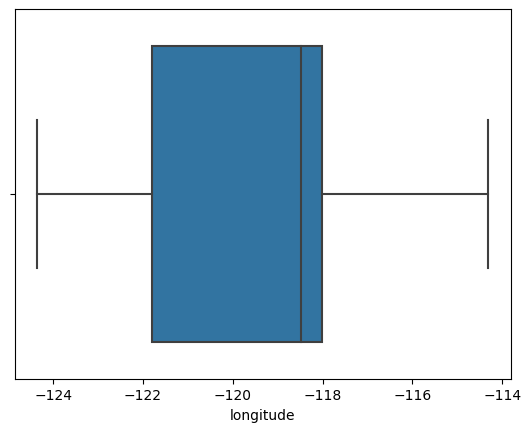

In [ ]:
sns.boxplot(x=df_train['longitude'])

<Axes: xlabel='latitude'>

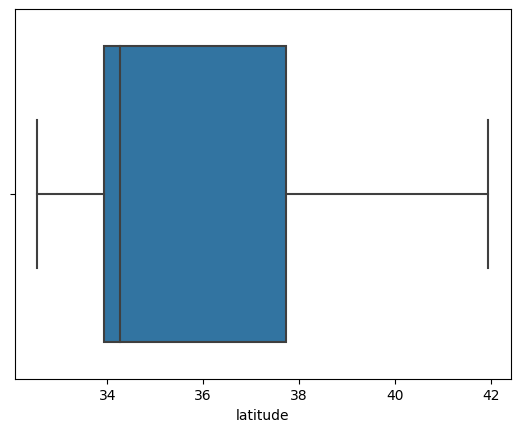

In [ ]:
sns.boxplot(x=df_train['latitude'])

<Axes: xlabel='housing_median_age'>

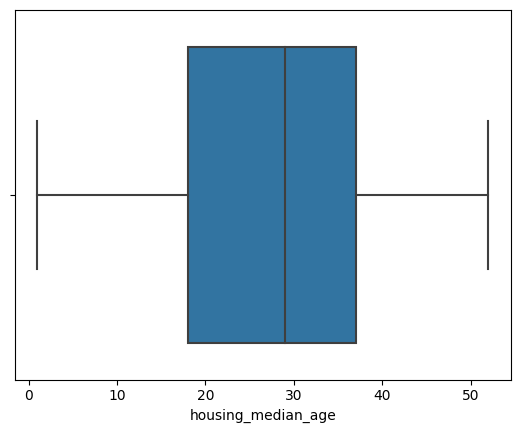

In [ ]:
sns.boxplot(x=df_train['housing_median_age'])

<Axes: xlabel='total_rooms'>

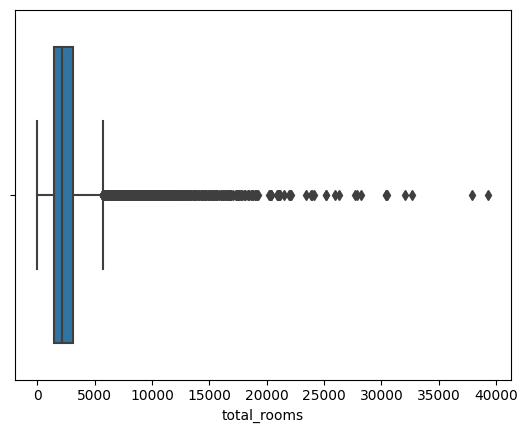

In [ ]:
sns.boxplot(x=df_train['total_rooms'])

<Axes: xlabel='total_bedrooms'>

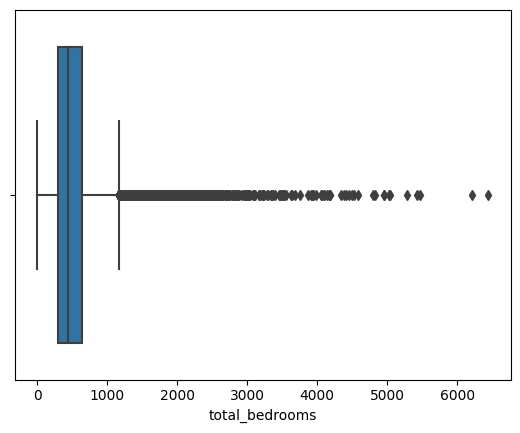

In [ ]:
sns.boxplot(x=df_train['total_bedrooms'])

<Axes: xlabel='population'>

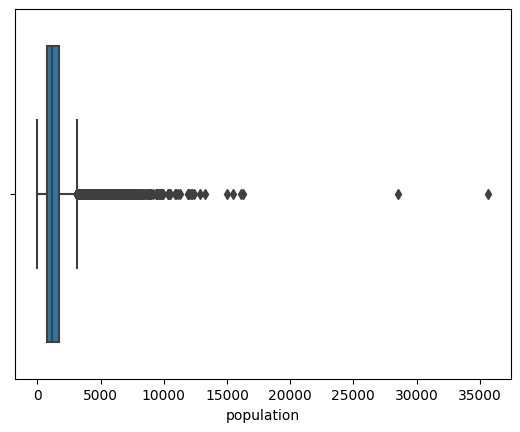

In [ ]:
sns.boxplot(x=df_train['population'])

<Axes: xlabel='households'>

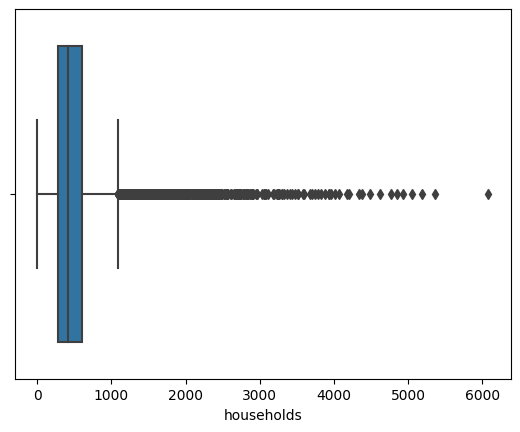

In [ ]:
sns.boxplot(x=df_train['households'])

<Axes: xlabel='median_income'>

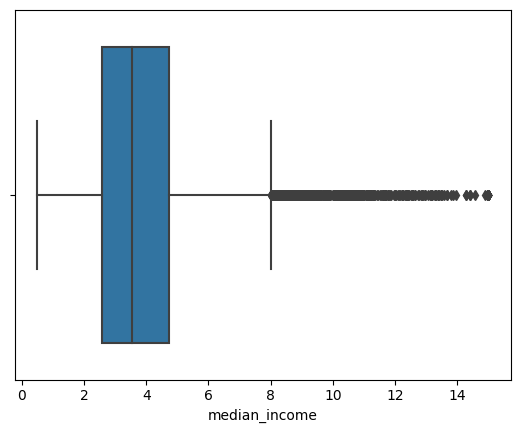

In [ ]:
sns.boxplot(x=df_train['median_income'])

<Axes: xlabel='median_house_value'>

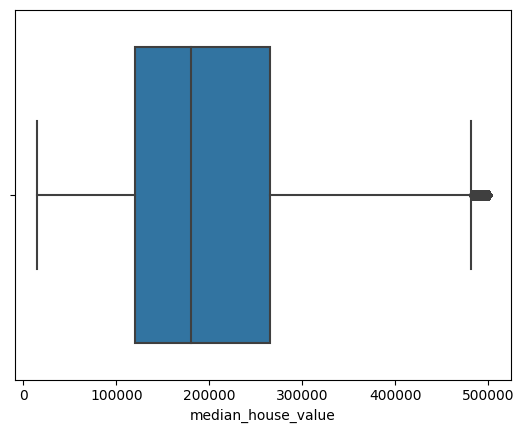

In [ ]:
sns.boxplot(x=df_train['median_house_value'])

In [ ]:
df_train.shape

(20433, 10)

In [ ]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR=Q3-Q1
df_train=df_train[~((df_train<(Q1-1.5*IQR))|(df_train>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df_train.shape

<ipython-input-27-8d16be584cce>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_train.quantile(0.25)
<ipython-input-27-8d16be584cce>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_train.quantile(0.75)
<ipython-input-27-8d16be584cce>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_train=df_train[~((df_train<(Q1-1.5*IQR))|(df_train>(Q3+1.5*IQR))).any(axis=1)]


(17429, 10)

# **Univariate Analysis**
proses menganalisis dan memahami suatu variabel dalam kumpulan data tanpa mempertimbangkan hubungannya dengan variabel lain. Tujuan dari analisis univariat adalah untuk mendapatkan gambaran mengenai distribusi, karakteristik dan pola dari variabel-variabel tersebut. 

#### Analisis fitur kategori
Untuk dataset ini, fitur kategori hanya berjumlah satu kolom yaitu fitur ocean_proximity. berikut rincian dari fitur ocean_proximity :

![ocean_proximity](https://i.ibb.co/Mnq5ccT/ocean.png)
Pada kolom ocean_proximity distribusi data tidak merata hal ini dapat dilihat pada rincian visualisai tersebut, dimana 1H OCEAN memiliki data terbanya dengan total sebesar 7531 sampel dengan presentase sebesar 43%. Data ISLAND memiliki jumlah perseberan yang sedikit yaitu sebesar 5 sampel saja.

#### Analisis fitur numerik
![numerik_1](https://i.ibb.co/6HBQmXv/numerik-1.png)
![numerik_2](https://i.ibb.co/Sd93yPJ/numerik-2.png)

Berikut merupakan rincian persebaran fitur numerik :
+ Fitur bujur dan lintang memiliki korelasi yang kuat dikarenakan kedua fitur tersebut memiliki korelasi tinggi.
+ Rata-rata median dari umur rumah terbanyak yaitu di rentang umur 10 - 50.
+ Rata-rata terbanyak pada fitur total room dan total bedroom ada di angka 2634 room dan 536 bedroom.
+ Populasi terbanyak ada di angka 35682 jiwa dan memiliki nila rata-rata sebesar 1424 jiwa.
+ Jumlah rumah tangga terbanyak di angka 6082 dan memiliki nilai rata-rata sebesar 499.
+ Untuk fitur median_income, longitude dan latitude sebenarnya tidak diperlukan. Akan tetapi fitur ini dimasukkan guna untuk pengujian kualitas model yang akan dihasilkan.

In [ ]:
data_numerik = df_train.select_dtypes(include=[np.number]).columns
data_numerik

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
data_kategori = df_train.select_dtypes(exclude=[np.number]).columns
data_kategori

Index(['ocean_proximity'], dtype='object')

In [ ]:
fitur_numerik = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

In [ ]:
fitur_kategori = ['ocean_proximity']

            jumlah sampel  persentase
1H OCEAN             7531        43.2
INLAND               5812        33.3
NEAR OCEAN           2198        12.6
NEAR BAY             1883        10.8
ISLAND                  5         0.0


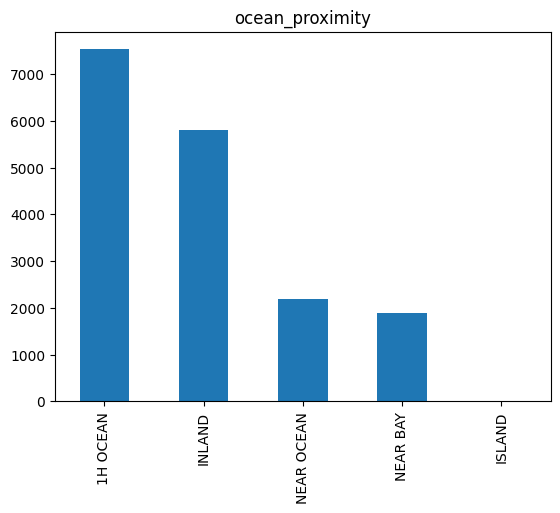

In [ ]:
#mengecek distribusi data untuk kolom kategori ocean proximity
feature = fitur_kategori[0]
count = df_train[feature].value_counts()
percent = 100 * df_train[feature].value_counts(normalize = True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

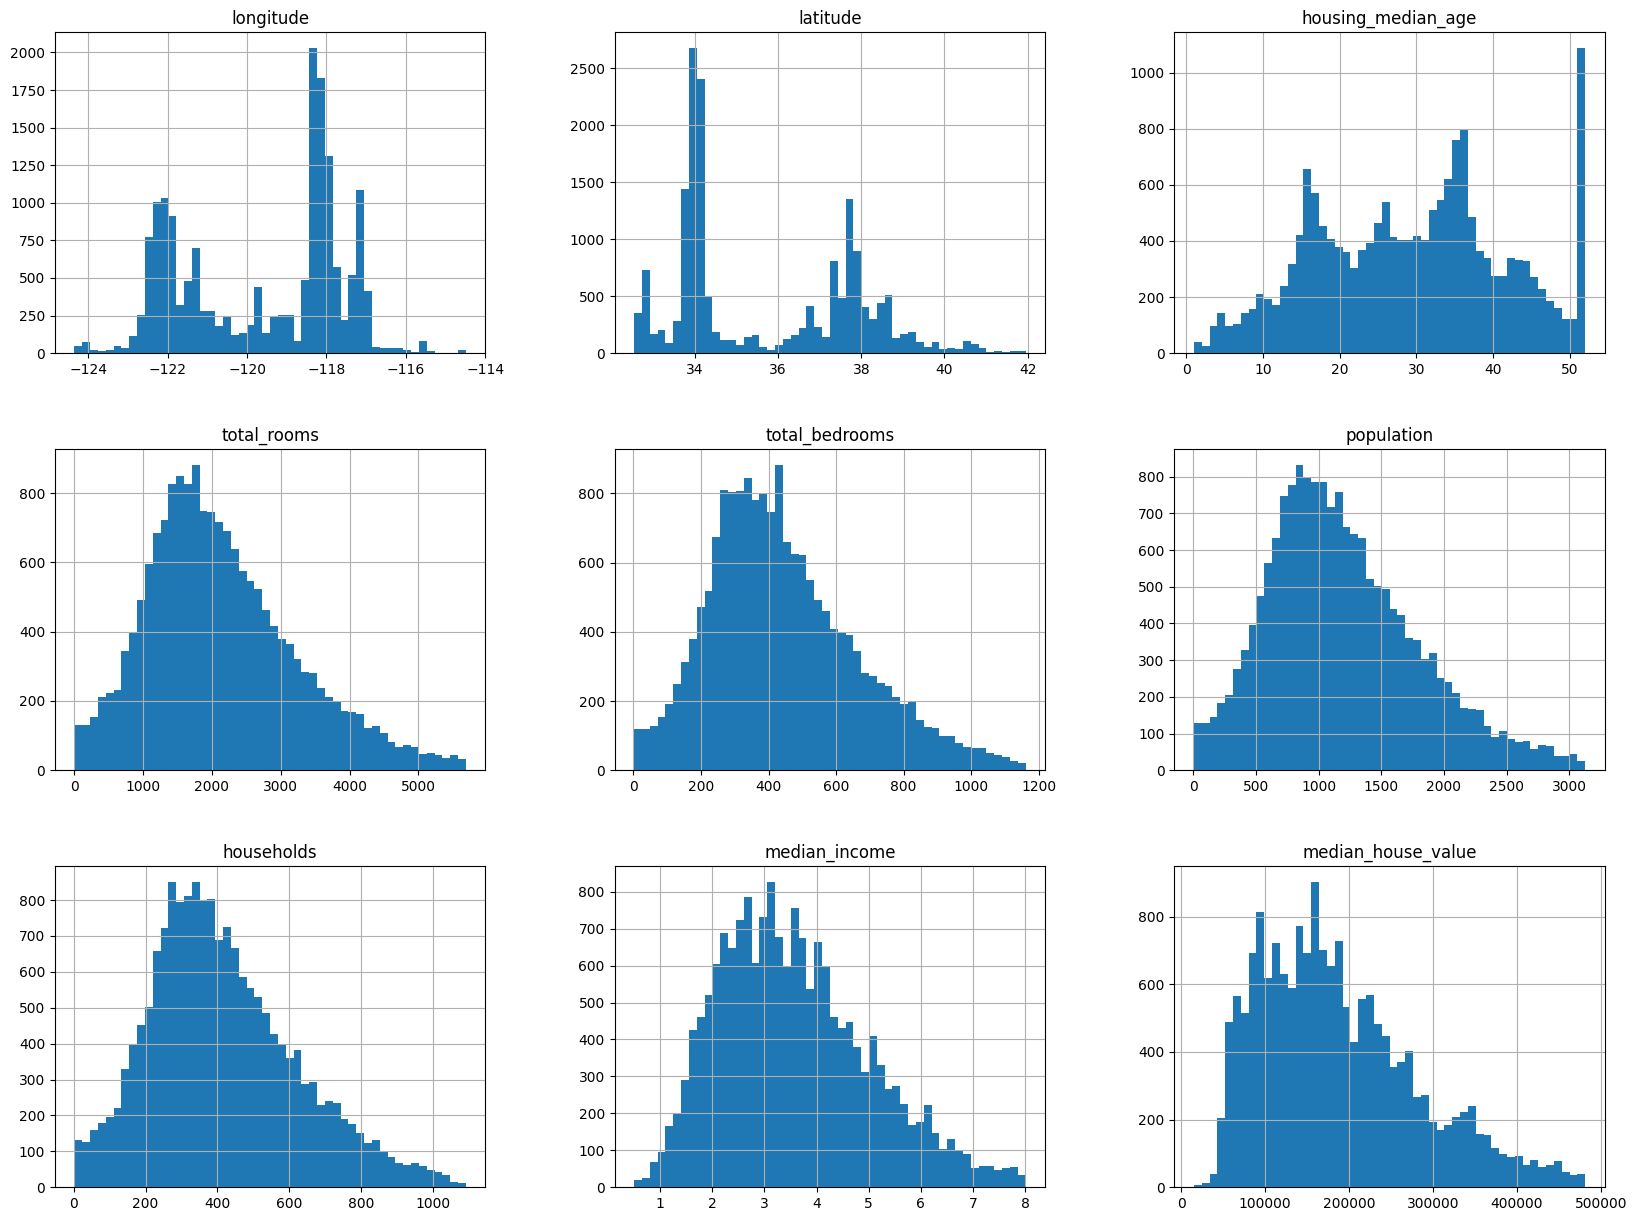

In [ ]:
df_train.hist(bins = 50, figsize = (20,15))
plt.show()

# **Multivariate Analysis**
Multivariate Analysis adalah Suatu analisis dilakukan untuk memahami hubungan antara dua variabel atau lebih secara bersamaan. Dalam analisis multivariat, kita melihat lebih dari satu variabel dalam analisis yang sama untuk melihat bagaimana variabel tersebut berhubungan, berinteraksi, atau saling mempengaruhi. Tujuan analisis multivariat adalah untuk mendapatkan pemahaman yang lebih lengkap tentang pola, tren, dan hubungan yang mungkin ada di antara variabel-variabel tersebut. Teknik yang biasa digunakan dalam analisis multivariat antara lain analisis regresi, analisis faktor, analisis kluster, analisis diskriminan, dll.

#### Analisis fitur kategori

![Multi_kategori](https://i.ibb.co/vQL0DZL/multi-kategori.png)
Untuk analisis Multi fitur yang digunakan untuk pengujian ini merupakan fitur yang akan di prediksi yaitu fitur median_house_value. harga rumah tertinggi ada di daerah pulau dan harga rumah terendah berada di daerah pedalaman atau pedesaan.

#### Analisis fitur numerik

![Multi_numerik](https://i.ibb.co/C8mHgxr/multi-korelasi.png)

Berikut merupakan rincian korelasi fitur numerik :
+ Fitur bujur tidak memiliki korelasi yang tinggi terhadap median house value hal ini terbukti dengan nilai korelai negatif -0.04.
+ Fitur lintang sama dengan fitur bujur yaitu tidak memiliki korelasi yang tinggi terhadap median house value dengan nilai korelasi sebesar negatif -0.16.
+ Fitur median umur rumah juga tidak memiliki nilai korelasi yang tinggi terhadap median house value dengan nilai korelasi positif 0.1.
+ Fitur jumlah kamar tidak memiliki nilai korelasi yang tinggi dengan median house value dengan nilai korelasi sebesar positif 0.09.
+ nilai korelasi dari fitur populasi dan rumah tangga juga tidak memiliki korelasi yang tinggi terhadap median house value dengan nilai korelasi sebesar negatif -0.01 untuk populasi dan positif 0.12 untuk rumah tangga.
+ Median income hanya satu-satu nya yang memiliki nilai korelasi yang besar yaitu 0.63

Untuk itu, fitur populasi memiliki nilai korelasi terkecil dari nilai korelasi fitur lainnya. Sehingga fitur populasi dihapus dari dataset.

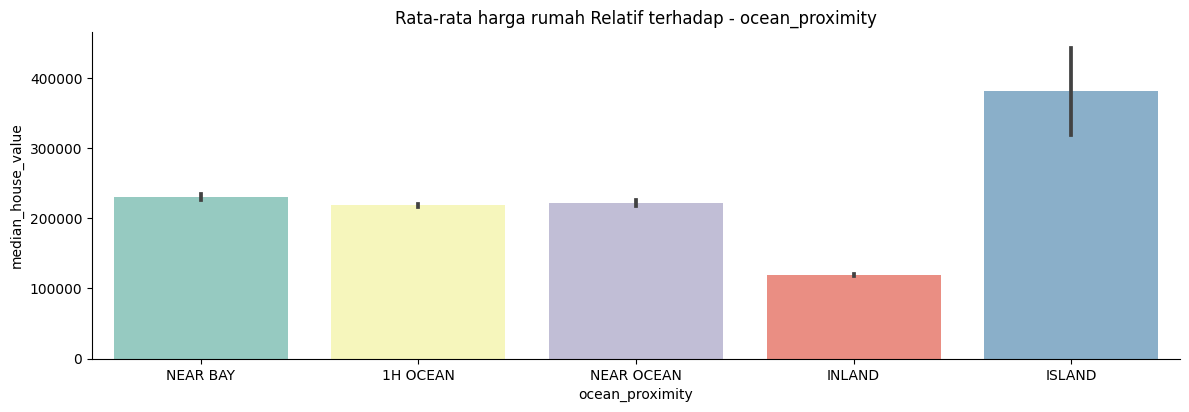

In [ ]:
cat_features = df_train.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="median_house_value", kind="bar", dodge=False, height = 4, aspect = 3,  data=df_train, palette="Set3")
  plt.title("Rata-rata harga rumah Relatif terhadap - {}".format(col))

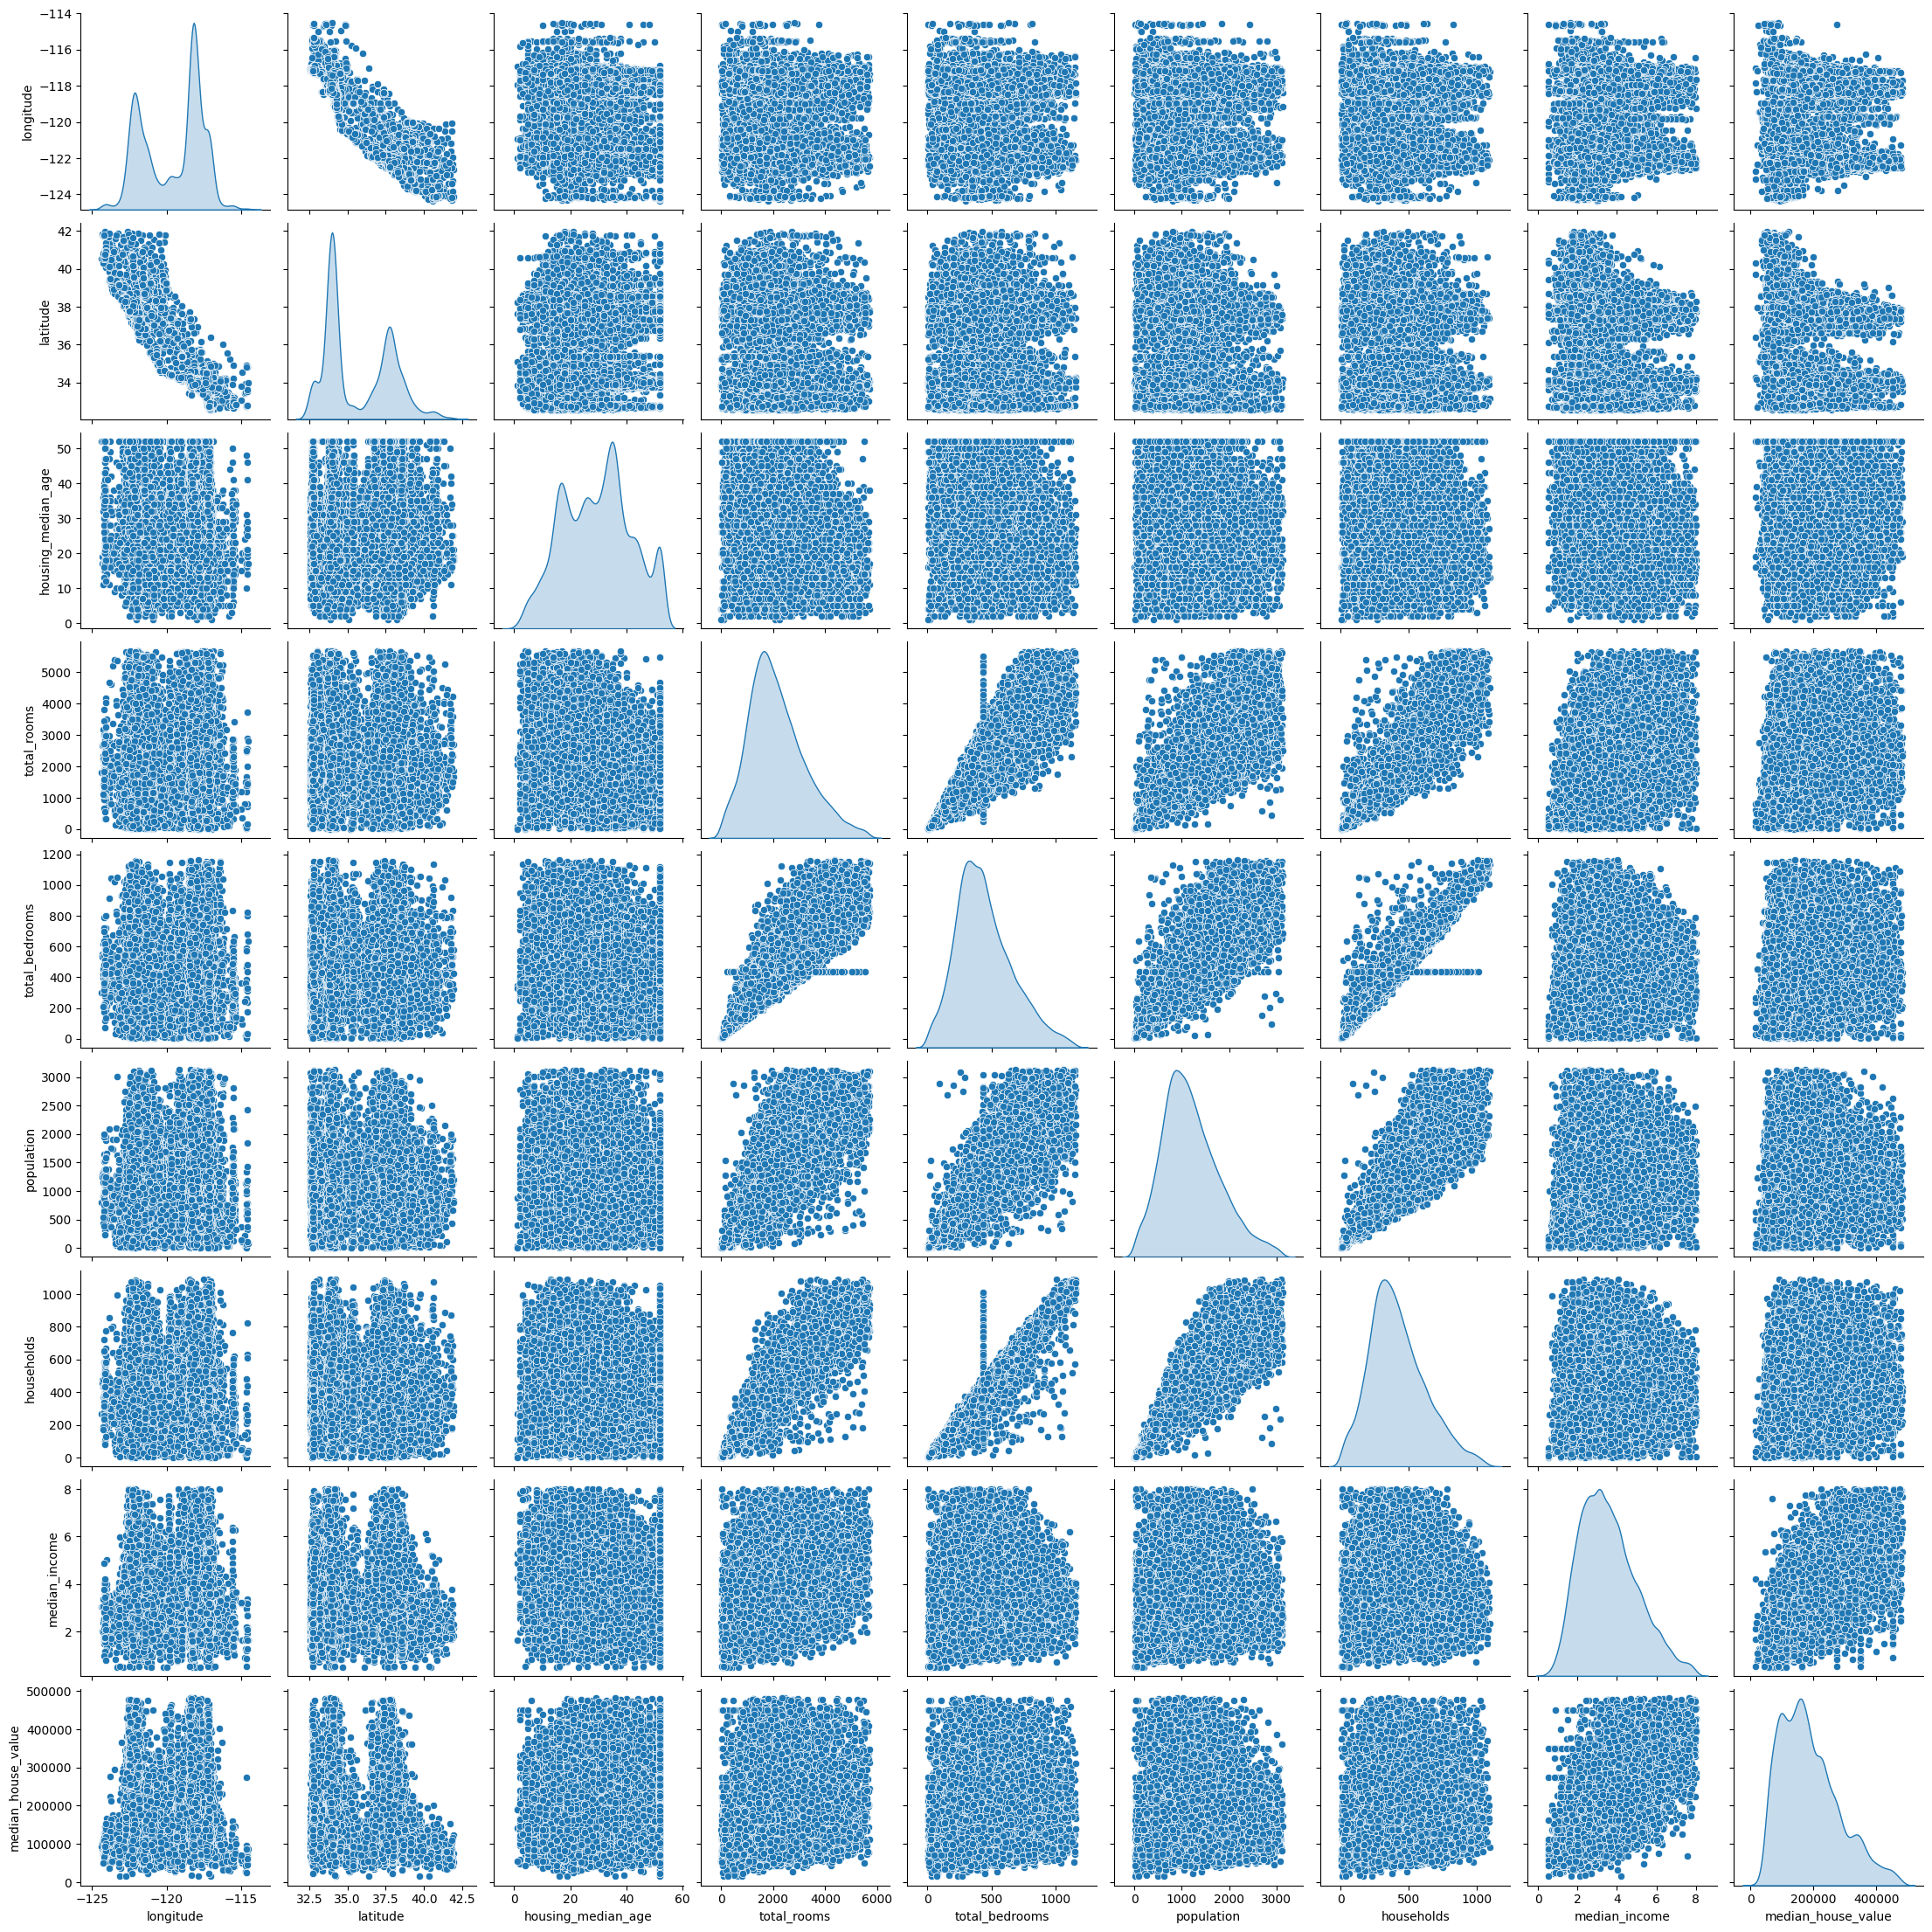

In [ ]:
sns.pairplot(df_train, diag_kind = 'kde')

<ipython-input-36-ec0bc0337f2e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

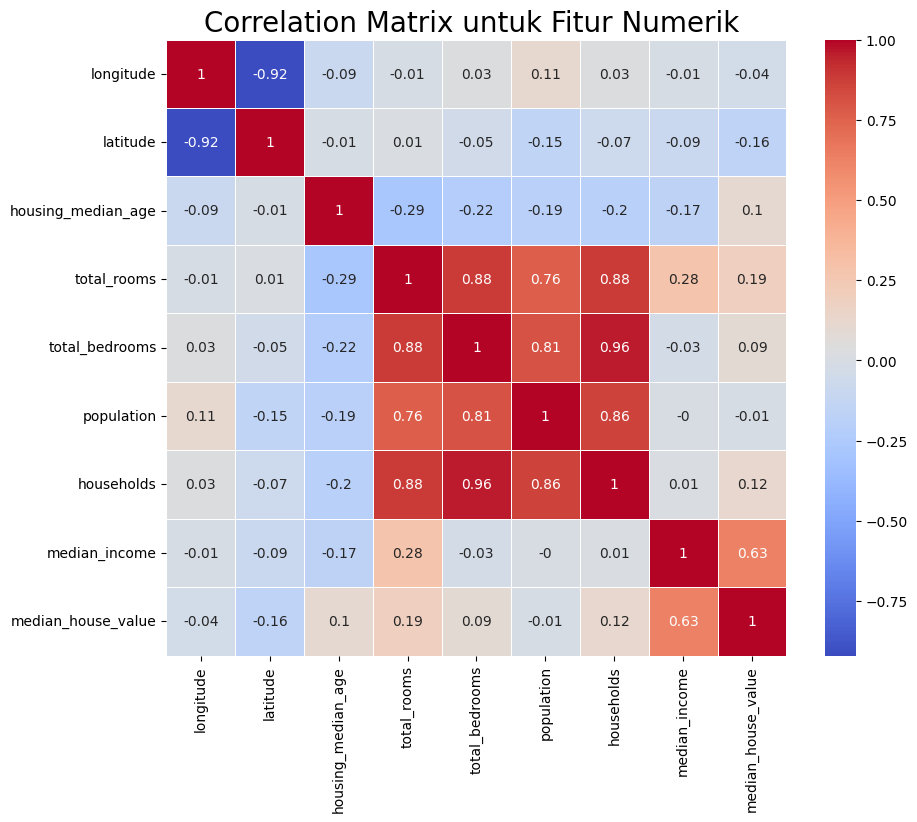

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_train.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
df_train.drop(['population'], inplace=True, axis=1)
df_train.head()

<ipython-input-37-a0f5a8bcf08c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['population'], inplace=True, axis=1)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.26     37.90                  37         2220           335.0   
1    -122.26     37.86                  52         3774           744.0   
2    -118.10     33.90                  35         1151           248.0   
3    -118.21     33.89                  42         1739           370.0   
4    -118.35     33.94                  35         1451           435.0   

   households  median_income ocean_proximity  median_house_value  
0         362         7.8336        NEAR BAY              371300  
1         679         2.9405        NEAR BAY              289500  
2         246         4.7813        1H OCEAN              160000  
3         297         2.2125        1H OCEAN              120700  
4         420         2.8462        1H OCEAN              149100

# **Data Preparation**
Persiapan data adalah proses persiapan data sebelum dilakukan analisis atau pemodelan. Tujuan dari persiapan data adalah untuk memastikan bahwa data yang digunakan dalam analisis atau pemodelan telah disiapkan, terstruktur dan memenuhi persyaratan. Beberapa langkah yang dilakukan dalam Data Preparation meliputi:

- Cleaning (Pembersihan): Melakukan identifikasi dan penanganan terhadap missing values (nilai kosong), outlier (nilai ekstrim), atau data yang tidak konsisten.
- Transformation (Transformasi): Melakukan transformasi terhadap data seperti normalisasi, standarisasi, atau pengubahan skala untuk memastikan data memiliki distribusi yang tepat.
- One Hot Encoding : Algoritma *machine learning* biasanya hanya dapat memproses data numerik. Pengkodean satu-panas memungkinkan variabel kategori untuk diubah menjadi representasi biner yang dapat dimanipulasi oleh suatu algoritma. 
- Train Test Split : Dalam *machine learning*, kita ingin mengevaluasi seberapa baik model dapat melakukan prediksi pada data yang belum pernah dilihat sebelumnya. Dengan membagi data menjadi train dan test set, dapat melatih model pada train set dan kemudian menguji performanya pada test set. Ini memberikan indikasi seberapa baik model dapat menggeneralisasi pada data yang baru.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_train = pd.concat([df_train, pd.get_dummies(df_train['ocean_proximity'], prefix='ocean_proximity')],axis=1)

df_train.drop(['ocean_proximity'], axis=1, inplace=True)
df_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.26     37.90                  37         2220           335.0   
1    -122.26     37.86                  52         3774           744.0   
2    -118.10     33.90                  35         1151           248.0   
3    -118.21     33.89                  42         1739           370.0   
4    -118.35     33.94                  35         1451           435.0   

   households  median_income  median_house_value  ocean_proximity_1H OCEAN  \
0         362         7.8336              371300                         0   
1         679         2.9405              289500                         0   
2         246         4.7813              160000                         1   
3         297         2.2125              120700                         1   
4         420         2.8462              149100                         1   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         0   
3                       0                       0                         0   
4                       0                       0                         0   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

# **Train-Test-Split**

In [ ]:
from sklearn.model_selection import train_test_split
 
X = df_train.drop(["median_house_value"],axis =1)
y = df_train["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 17429
Total # of sample in train dataset: 15686
Total # of sample in test dataset: 1743


In [ ]:
from sklearn.preprocessing import StandardScaler

fitur_numerik2 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'households', 'median_income']
scaler = StandardScaler()
scaler.fit(X_train[fitur_numerik2])
X_train[fitur_numerik2] = scaler.transform(X_train.loc[:, fitur_numerik2])
X_train[fitur_numerik2].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
673     1.258341 -1.192838            0.118702    -0.717721       -0.547085   
11864   0.590076 -0.773284            0.364193     0.097089       -0.000966   
19949   0.674856 -0.777894           -0.126788    -1.521508       -1.402672   
18500  -1.170352  0.711294            0.609683     0.892608        0.440481   
6312    0.610025 -0.759452            1.837136    -1.041073       -0.970327   

       households  median_income  
673     -0.413150      -0.714797  
11864   -0.013237       0.971232  
19949   -1.403178      -1.610619  
18500    0.625647       1.702502  
6312    -0.925233       0.467604

In [ ]:
X_train[fitur_numerik2].describe().round(4)

longitude    latitude  housing_median_age  total_rooms  \
count  15686.0000  15686.0000          15686.0000   15686.0000   
mean      -0.0000      0.0000             -0.0000      -0.0000   
std        1.0000      1.0000              1.0000       1.0000   
min       -2.3672     -1.4556             -2.3362      -1.9615   
25%       -1.0893     -0.8102             -0.8633      -0.7049   
50%        0.5053     -0.6442              0.0369      -0.1537   
75%        0.7846      0.9418              0.6915       0.5874   
max        2.5500      2.8828              1.8371       3.2617   

       total_bedrooms  households  median_income  
count      15686.0000  15686.0000     15686.0000  
mean           0.0000      0.0000         0.0000  
std            1.0000      1.0000         1.0000  
min           -2.0125     -2.0177        -2.1229  
25%           -0.7155     -0.7106        -0.7550  
50%           -0.1420     -0.1449        -0.1335  
75%            0.5952      0.6013         0.6301  
max            3.2621      3.2934         3.0792

In [ ]:
X_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
673     1.258341 -1.192838            0.118702    -0.717721       -0.547085   
11864   0.590076 -0.773284            0.364193     0.097089       -0.000966   
19949   0.674856 -0.777894           -0.126788    -1.521508       -1.402672   
18500  -1.170352  0.711294            0.609683     0.892608        0.440481   
6312    0.610025 -0.759452            1.837136    -1.041073       -0.970327   

       households  median_income  ocean_proximity_1H OCEAN  \
673     -0.413150      -0.714797                         1   
11864   -0.013237       0.971232                         1   
19949   -1.403178      -1.610619                         1   
18500    0.625647       1.702502                         1   
6312    -0.925233       0.467604                         1   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
673                         0                       0   
11864                       0                       0   
19949                       0                       0   
18500                       0                       0   
6312                        0                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
673                           0                           0  
11864                         0                           0  
19949                         0                           0  
18500                         0                           0  
6312                          0                           0

In [ ]:
y_train.head()

673      115100
11864    414100
19949     90300
18500    413500
6312     351000
Name: median_house_value, dtype: int64

# **Modeling With Machine Learning**
Pada tahap modeling ini akan menjadi tahap jawaban untuk problem statement sebelum nya yaitu mengenai diproses nya data agar model dapat melatihnya dan peran *hyperparameter tuning* pada model yang digunakan. Untuk model yang digunakan merupakan model bertipa regresi dengan pemanfaatan model XGBoost.

+ XGBoost regresi merupakan adalah sebuah algoritma machine learning yang populer dan efektif dalam melakukan tugas-tugas regresi. XGBoost regresi merupakan varian dari algoritma XGBoost yang digunakan khusus untuk memodelkan dan memprediksi variabel target kontinu (numerik). XGBoost regresi bekerja dengan membangun serangkaian pohon keputusan secara bertahap. Pada setiap tahap, model mencoba memperbaiki kesalahan prediksi dari tahap sebelumnya dengan menambahkan pohon baru. Proses ini dilakukan secara berulang hingga mencapai jumlah pohon yang ditentukan atau mencapai titik di mana penambahan pohon tidak memberikan peningkatan yang signifikan dalam kinerja model.XGBoost regresi memiliki beberapa keunggulan, antara lain: 
  + Kemampuan untuk menangani data dengan fitur-fitur yang beragam, baik kategorikal maupun numerik.
  + Kecepatan dan efisiensi yang tinggi, sehingga cocok untuk dataset yang besar.
  + Mampu menangani interaksi non-linear antar fitur.
  + Kemampuan untuk menangani missing values pada dataset.
  + Adanya mekanisme regularisasi yang membantu mengurangi overfitting.
+ Penggunaan *Hyperparameter Tuning*
  Grid Search adalah salah satu teknik yang digunakan dalam pemilihan parameter optimal untuk model machine learning. Tujuan dari Grid Search adalah untuk mencari kombinasi parameter terbaik yang memberikan performa model yang optimal. berikut parmeter yang digunakan pada proyek ini :
  + `n_estimators` : jumlah estimator ketika boosting dihentikan.
  + `max_depth` : jumlah kedalaman maksimum dari semua tree.
  + `learning_rate` : untuk memperkuat kontribusi dalam setiap regresor.
+ Setingan parmeter yang digunakan GridSearch untuk proyek ini:
   model    | best_params                                                     |
  |----------|-----------------------------------------------------------------|
  | XGBoost Regresor    | {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}                                              |

In [ ]:
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

##Tidak Menggunakan Fine Tuning

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 20769573194.764935


##Menggunakan Fine Tuning

In [ ]:
param_Grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [ ]:
model2 = XGBRegressor()

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_Grid, scoring='neg_mean_squared_error', cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Parameter Terbaik :", grid_search.best_params_)

Parameter Terbaik : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [ ]:
print("Best MSE:", -grid_search.best_score_)

Best MSE: 1854152274.0143313


In [ ]:
xgb_FT_Param = XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 300)

In [ ]:
xgb_FT_Param.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred2 = xgb_FT_Param.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error:", mse)

Mean Squared Error: 21454726969.439857


In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['XGBoost_Non_HP','XGBoost_Wth_HP'])
model_save = {'XGBoost_Non_HP': model, 'XGBoost_Wth_HP': xgb_FT_Param}

for name, model in model_save.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
      
    mse.loc[name, 'train'] = mean_squared_error(y_train, y_train_pred) / 1e3
    mse.loc[name, 'test'] = mean_squared_error(y_test, y_test_pred) / 1e3

In [ ]:
mse

train             test
XGBoost_Non_HP   788683.201051  20769573.194765
XGBoost_Wth_HP  1077382.035362   21454726.96944

#**Prediksi Menggunakan Data Testing**

In [ ]:
df_tes = pd.read_csv('/content/kumpulan_dataset/california house price dataset/test.csv')

In [ ]:
df_tes.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -117.96     33.81                  34         1416           277.0   
1    -117.79     33.76                  25         2037           252.0   
2    -121.62     36.69                  12          512           144.0   
3    -118.04     33.83                  19         4526           830.0   
4    -118.24     33.85                  25         9594          1489.0   

   population  households  median_income ocean_proximity  median_house_value  
0         980         284         4.7772       <1H OCEAN              182500  
1         796         249        11.0546       <1H OCEAN              487200  
2         767         149         2.2667       <1H OCEAN               72900  
3        2318         748         4.6681       <1H OCEAN              320700  
4        5237        1496         5.9684       <1H OCEAN              193300

In [ ]:
df_tes.drop(['median_house_value', 'population'], inplace=True, axis=1)
df_tes.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -117.96     33.81                  34         1416           277.0   
1    -117.79     33.76                  25         2037           252.0   
2    -121.62     36.69                  12          512           144.0   
3    -118.04     33.83                  19         4526           830.0   
4    -118.24     33.85                  25         9594          1489.0   

   households  median_income ocean_proximity  
0         284         4.7772       <1H OCEAN  
1         249        11.0546       <1H OCEAN  
2         149         2.2667       <1H OCEAN  
3         748         4.6681       <1H OCEAN  
4        1496         5.9684       <1H OCEAN

In [ ]:
df_tes.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        2
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [ ]:
df_tes.duplicated().sum()

0

In [ ]:
for col in df_tes.select_dtypes(include=[np.number]).columns:
    count = (df_tes[col] == 0).sum()
    print(f"Nilai 0 di kolom {col} ada: {count}")

Nilai 0 di kolom longitude ada: 0
Nilai 0 di kolom latitude ada: 0
Nilai 0 di kolom housing_median_age ada: 0
Nilai 0 di kolom total_rooms ada: 0
Nilai 0 di kolom total_bedrooms ada: 0
Nilai 0 di kolom households ada: 0
Nilai 0 di kolom median_income ada: 0


In [ ]:
#mengisi nilai null di kolom total bedrooms
df_tes['total_bedrooms'] = df_tes['total_bedrooms'].fillna(df_tes['total_bedrooms'].median())

In [ ]:
df_tes.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [ ]:
df_tes['ocean_proximity'] = df_tes['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')

In [ ]:
df_tes.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -117.96     33.81                  34         1416           277.0   
1    -117.79     33.76                  25         2037           252.0   
2    -121.62     36.69                  12          512           144.0   
3    -118.04     33.83                  19         4526           830.0   
4    -118.24     33.85                  25         9594          1489.0   

   households  median_income ocean_proximity  
0         284         4.7772        1H OCEAN  
1         249        11.0546        1H OCEAN  
2         149         2.2667        1H OCEAN  
3         748         4.6681        1H OCEAN  
4        1496         5.9684        1H OCEAN

In [ ]:
df_tes.describe()

longitude    latitude  housing_median_age   total_rooms  \
count  207.000000  207.000000          207.000000    207.000000   
mean  -119.559130   35.500242           27.468599   2777.106280   
std      2.006969    2.031921           12.321649   2096.070864   
min   -124.140000   32.560000            4.000000     54.000000   
25%   -121.835000   33.955000           18.000000   1530.000000   
50%   -118.660000   34.250000           27.000000   2234.000000   
75%   -118.025000   37.430000           36.000000   3441.500000   
max   -115.520000   40.770000           52.000000  14652.000000   

       total_bedrooms   households  median_income  
count      207.000000   207.000000     207.000000  
mean       561.913043   527.545894       3.930246  
std        442.116788   412.193937       1.847794  
min          9.000000     6.000000       0.536000  
25%        297.500000   289.000000       2.638500  
50%        449.000000   425.000000       3.616700  
75%        679.500000   641.000000       4.895850  
max       2826.000000  2660.000000      11.054600

In [ ]:
df_tes = pd.concat([df_tes, pd.get_dummies(df_tes['ocean_proximity'], prefix='ocean_proximity')],axis=1)

df_tes.drop(['ocean_proximity'], axis=1, inplace=True)
df_tes.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -117.96     33.81                  34         1416           277.0   
1    -117.79     33.76                  25         2037           252.0   
2    -121.62     36.69                  12          512           144.0   
3    -118.04     33.83                  19         4526           830.0   
4    -118.24     33.85                  25         9594          1489.0   

   households  median_income  ocean_proximity_1H OCEAN  \
0         284         4.7772                         1   
1         249        11.0546                         1   
2         149         2.2667                         1   
3         748         4.6681                         1   
4        1496         5.9684                         1   

   ocean_proximity_INLAND  ocean_proximity_NEAR BAY  \
0                       0                         0   
1                       0                         0   
2                       0                         0   
3                       0                         0   
4                       0                         0   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [ ]:
fitur_numerik3 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'households', 'median_income']
scaler = StandardScaler()
scaler.fit(df_tes[fitur_numerik3])
df_tes[fitur_numerik3] = scaler.transform(df_tes.loc[:, fitur_numerik3])
df_tes[fitur_numerik3].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.798721 -0.833861            0.531360    -0.650935       -0.645992   
1   0.883631 -0.858528           -0.200832    -0.353948       -0.702675   
2  -1.029346  0.586953           -1.258443    -1.083264       -0.947546   
3   0.758763 -0.823994           -0.688960     0.836390        0.607841   
4   0.658868 -0.814127           -0.200832     3.260109        2.102011   

   households  median_income  
0   -0.592285       0.459471  
1   -0.677402       3.864946  
2   -0.920595      -0.902470  
3    0.536128       0.400284  
4    2.355207       1.105694

In [ ]:
df_tes

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     0.798721 -0.833861            0.531360    -0.650935       -0.645992   
1     0.883631 -0.858528           -0.200832    -0.353948       -0.702675   
2    -1.029346  0.586953           -1.258443    -1.083264       -0.947546   
3     0.758763 -0.823994           -0.688960     0.836390        0.607841   
4     0.658868 -0.814127           -0.200832     3.260109        2.102011   
..         ...       ...                 ...          ...             ...   
202  -1.239124  1.356561            0.775424    -0.765713       -0.614249   
203   1.253240 -1.396266           -0.933025    -0.291299       -0.496348   
204   0.868647 -0.799327           -1.014379     1.250546        0.755218   
205   0.758763 -0.878261           -0.282187     2.086987        1.741506   
206   0.763757 -0.754927            0.694070    -0.562461       -0.616516   

     households  median_income  ocean_proximity_1H OCEAN  \
0     -0.592285       0.459471                         1   
1     -0.677402       3.864946                         1   
2     -0.920595      -0.902470                         1   
3      0.536128       0.400284                         1   
4      2.355207       1.105694                         1   
..          ...            ...                       ...   
202   -0.623900      -0.658346                         0   
203   -0.460961       0.844156                         0   
204    0.728250       1.241373                         1   
205    1.800728       0.398548                         1   
206   -0.592285       0.480085                         1   

     ocean_proximity_INLAND  ocean_proximity_NEAR BAY  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   
..                      ...                       ...   
202                       1                         0   
203                       0                         0   
204                       0                         0   
205                       0                         0   
206                       0                         0   

     ocean_proximity_NEAR OCEAN  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
..                          ...  
202                           0  
203                           1  
204                           0  
205                           0  
206                           0  

[207 rows x 11 columns]

In [ ]:
df_tes.insert(9, 'ocean_proximity_ISLAND', None)

In [ ]:
df_tes.loc[:, 'ocean_proximity_ISLAND'] = 0

<ipython-input-82-469b15101e35>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_tes.loc[:, 'ocean_proximity_ISLAND'] = 0


In [ ]:
df_tes.shape

(207, 12)

In [ ]:
df_tes

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     0.798721 -0.833861            0.531360    -0.650935       -0.645992   
1     0.883631 -0.858528           -0.200832    -0.353948       -0.702675   
2    -1.029346  0.586953           -1.258443    -1.083264       -0.947546   
3     0.758763 -0.823994           -0.688960     0.836390        0.607841   
4     0.658868 -0.814127           -0.200832     3.260109        2.102011   
..         ...       ...                 ...          ...             ...   
202  -1.239124  1.356561            0.775424    -0.765713       -0.614249   
203   1.253240 -1.396266           -0.933025    -0.291299       -0.496348   
204   0.868647 -0.799327           -1.014379     1.250546        0.755218   
205   0.758763 -0.878261           -0.282187     2.086987        1.741506   
206   0.763757 -0.754927            0.694070    -0.562461       -0.616516   

     households  median_income  ocean_proximity_1H OCEAN  \
0     -0.592285       0.459471                         1   
1     -0.677402       3.864946                         1   
2     -0.920595      -0.902470                         1   
3      0.536128       0.400284                         1   
4      2.355207       1.105694                         1   
..          ...            ...                       ...   
202   -0.623900      -0.658346                         0   
203   -0.460961       0.844156                         0   
204    0.728250       1.241373                         1   
205    1.800728       0.398548                         1   
206   -0.592285       0.480085                         1   

     ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0                       0                         0   
1                         0                       0                         0   
2                         0                       0                         0   
3                         0                       0                         0   
4                         0                       0                         0   
..                      ...                     ...                       ...   
202                       1                       0                         0   
203                       0                       0                         0   
204                       0                       0                         0   
205                       0                       0                         0   
206                       0                       0                         0   

     ocean_proximity_NEAR OCEAN  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
..                          ...  
202                           0  
203                           1  
204                           0  
205                           0  
206                           0  

[207 rows x 12 columns]

In [ ]:
Pred_XG_Tes_data = xgb_FT_Param.predict(df_tes)

In [ ]:
output_XG = pd.DataFrame({'longitude': df_tes.longitude, 'latitude': df_tes.latitude, 'housing median age': df_tes.housing_median_age, 'prediksi': Pred_XG_Tes_data })
output_XG.to_csv('result.RF.csv', index=False)

In [ ]:
df_pred = pd.read_csv('/content/result.RF.csv')

In [ ]:
df_pred

longitude  latitude  housing median age   prediksi
0     0.798721 -0.833861            0.531360  176743.61
1     0.883631 -0.858528           -0.200832  372898.56
2    -1.029346  0.586953           -1.258443  191887.78
3     0.758763 -0.823994           -0.688960  199692.70
4     0.658868 -0.814127           -0.200832  296143.62
..         ...       ...                 ...        ...
202  -1.239124  1.356561            0.775424  114999.53
203   1.253240 -1.396266           -0.933025  155440.47
204   0.868647 -0.799327           -1.014379  246554.47
205   0.758763 -0.878261           -0.282187  244086.53
206   0.763757 -0.754927            0.694070  206896.67

[207 rows x 4 columns]

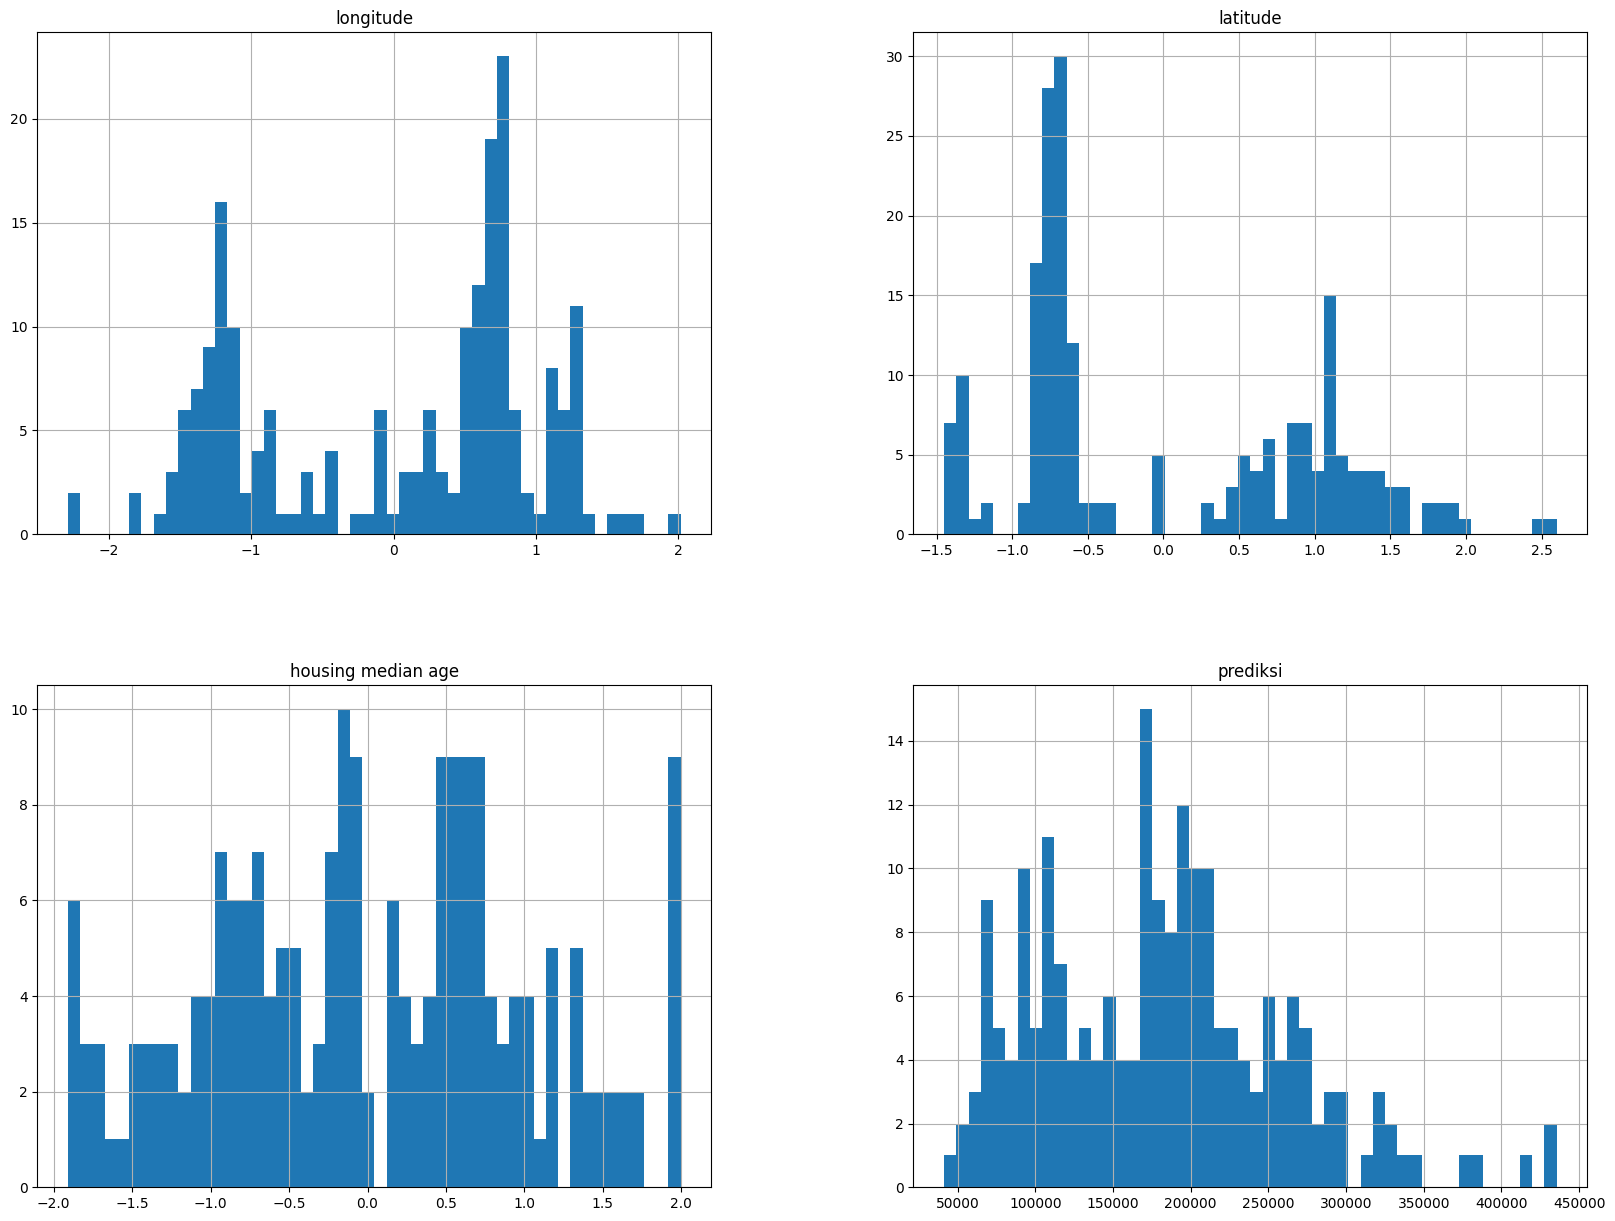

In [ ]:
df_pred.hist(bins = 50, figsize = (20,15))
plt.show()